In [43]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape 

(60000, 28, 28)

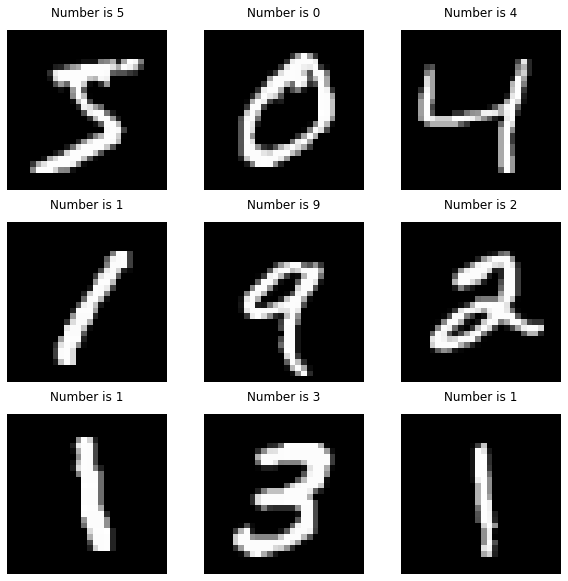

In [44]:
import matplotlib.pyplot as plt
#%matplotlib inline
fig, axs = plt.subplots(3,3, figsize = (10,10))
plt.gray()
for i, ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number is {}'.format(y_train[i]))
fig.show()

In [48]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = ( 28, 28, 1)
print(x_train.ndim)

4


In [49]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax)) 

In [55]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 33s 17ms/step - loss: 0.5660 - accuracy: 0.8314
Epoch 2/3
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2239 - accuracy: 0.9340
Epoch 3/3
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1648 - accuracy: 0.9500


In [57]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.1192 - accuracy: 0.9653


[0.11916569620370865, 0.9653000235557556]